## Neccesary Libs

In [58]:
import numpy as np #برای کار با داده های عددی
import pandas as pd #برای پردازش و تحلیل داده
from sklearn.model_selection import train_test_split #برای تقسیم داده به دو قسمت آموزشی و تستی
from sklearn.feature_extraction.text import CountVectorizer # تبدیل داده متنی به بردار شمارش
from sklearn.naive_bayes import MultinomialNB #الگوریتم نیو ساده چندجمله ای
from sklearn.metrics import classification_report #ارزیابی مدل طبقه بندی 
import seaborn as sns # برای رسم نمودار
from matplotlib import pyplot as plt # برای سفارشی کردن نمودار

## Importing data & Checking it

In [4]:
#وارد کردن داده به برنامه
data = pd.read_csv('dataset.csv')
data.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [5]:
# تعداد مقادیر هر ستون و نوع مقادیر
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [9]:
# زبان های موجود در دیتاست
data['language'].unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [6]:
# تعداد مقادیر هر زبان
data['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [70]:
# Text -> متن
# Language -> زبان متن

## Data Analysis

<AxesSubplot: xlabel='language', ylabel='wordCount'>

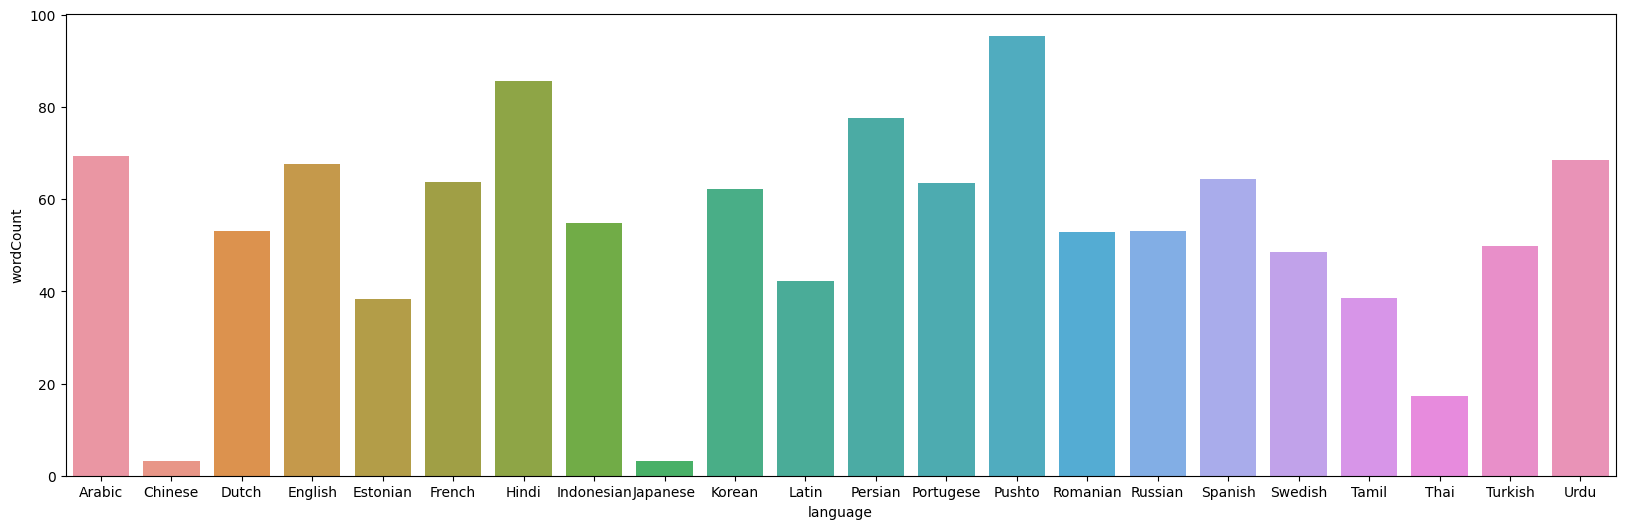

In [62]:
# میانگین تعداد کلمات موحود در جمله بر اساس زبان
data['wordCount'] = data['Text'].apply(lambda x: len(x.split()))
mean_data = data.groupby('language').mean(numeric_only=True)
plt.figure(figsize=(20, 6))
sns.barplot(x=mean_data.index, y=mean_data.wordCount)

In [23]:
# نمونه داده های زبان فارسی
data[data['language'] == 'Persian'].head()

,Text,language,wordCount
29,آهن ترکیباتی را ایجاد می‌کند که عمدتاً در حالت...,Persian,52
64,مدت‌ها پیش از ظهور مسیحیت گیاهان و درختان سبز ...,Persian,170
78,استاد «سید متولی عبدالعال» از جمله قاریان بنام...,Persian,51
82,زیردریایی یو- به انگلیسی german submarine u- ی...,Persian,31
103,نظم و نثر فارسی و تاجیکی در طول چندین عصرها تر...,Persian,252


## Preprocessing data

In [24]:
X = data['Text']
y = data['language']

In [26]:
# تبدیل مقادیر رشته ای به بردار شمارش جهت پردازش توسط مدل
cv = CountVectorizer()
X = cv.fit_transform(X)

In [27]:
# تقسیم داده به دو قسمت آموزشی و ارزیابی با نسبت 30 به 70
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

## Training Model

In [28]:
# ایحاد مدل نایوبیز و آموزش دادن آن با داده خود
model = MultinomialNB()
model.fit(X_train, y_train)
model

MultinomialNB()

## Evaluating Model

In [29]:
model.score(X_test, y_test)

0.9586363636363636

In [31]:
y_pred = model.predict(X_test)

In [37]:
# بررسی عملکرد مدل روی داده تستی
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       290
     Chinese       0.96      0.57      0.71       304
       Dutch       0.98      0.98      0.98       261
     English       0.70      1.00      0.82       283
    Estonian       0.99      0.96      0.98       307
      French       0.96      0.99      0.98       306
       Hindi       0.99      0.98      0.99       292
  Indonesian       1.00      0.99      0.99       310
    Japanese       0.74      0.89      0.81       311
      Korean       1.00      0.99      0.99       290
       Latin       0.98      0.93      0.96       310
     Persian       1.00      1.00      1.00       294
   Portugese       0.99      0.94      0.97       292
      Pushto       1.00      0.98      0.99       312
    Romanian       1.00      1.00      1.00       308
     Russian       0.99      0.99      0.99       307
     Spanish       0.99      0.99      0.99       290
     Swedish       0.99    

In [42]:
# استفاده از مدل برای پیش بینی زبان متن موردنظر کاربر
user_inp = input('Enter your text: ')
cv_inp = cv.transform([user_inp]).toarray()
pred = model.predict(cv_inp)
print(pred)

Enter your text: me encanta programar sígueme en @amireol
['Spanish']


In [46]:
user_inp = input('Enter your text: ')
cv_inp = cv.transform([user_inp]).toarray()
pred = model.predict(cv_inp)
print(pred)

Enter your text: سلام من عاشق برنامه نویسی هستم
['Persian']


# @amirDataScience 
# Follow me on Instagram, Telegram